In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import circlify


In [39]:
df = pd.read_excel('data.xlsx')
df = df.drop_duplicates()

# rename price as number to price
df = df.rename(columns={'Price as number': 'Price'})


In [40]:
# build dictionary with pizza styles and their popularity
pizza_styles = df['Style'].value_counts().to_dict()

circles = circlify.circlify(
    pizza_styles.values(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)



0.9759936649200115


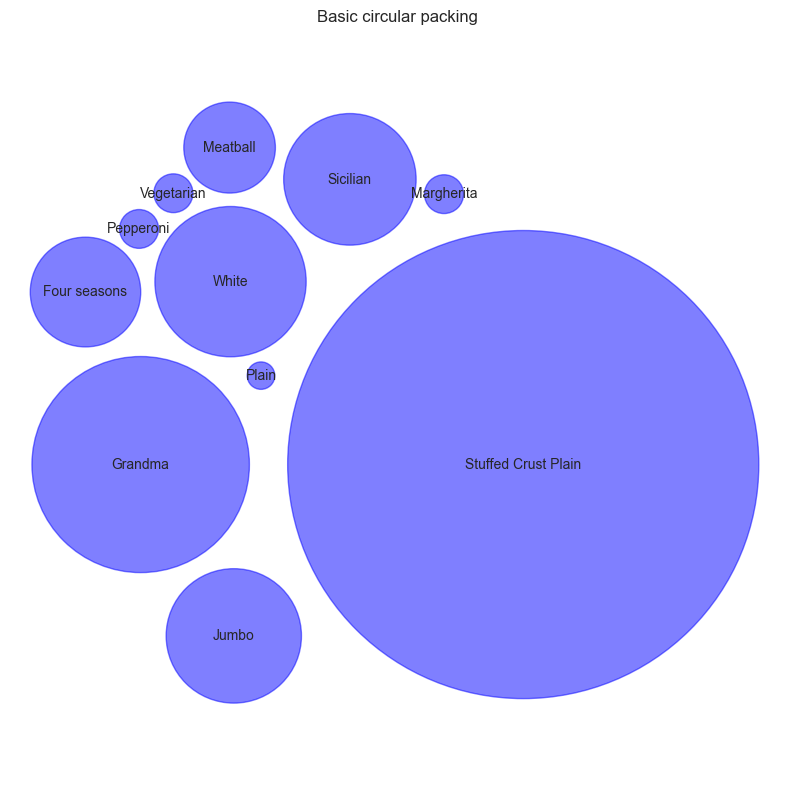

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Basic circular packing')
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r
    ) for circle in circles
)

print(lim)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = pizza_styles.keys()

for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r * 0.9 , color='blue', alpha=0.5))
    plt.annotate(
        label,
        xy=(x, y),
        va='center',
        ha='center',
    )
